In [44]:
import sys
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import os
import sys
import jieba
import jieba.analyse
import jieba.posseg as pseg
import codecs
from gensim import corpora, models, similarities

In [312]:
jieba.set_dictionary('dict.txt') # 繁體字詞庫

### 匯入文本：挑選2004~2018每年專輯的一首歌，做文字雲及tf-idf分析，想要看歷年來的歌詞內容重點著重的地方，以下的歌詞取自魔境歌詞網、kkbox

In [314]:
lyric_2004 = '''海的思念綿延不絕 終於和天 在地平線交會
愛如果走得夠遠 應該也會跟幸福相見
承諾常常很像蝴蝶 美麗的飛 盤旋然後不見
但我相信你給我的誓言 就像一定會來的春天
我始終帶著你愛的微笑 一路上尋找我遺失的美好
不小心當淚滑落嘴角 就用你握過的手抹掉
再多的風景也從不停靠 只一心尋找我遺失的美好
有的人說不清哪裡好 但就是誰都替代不了
承諾常常很像蝴蝶 美麗的飛 盤旋然後不見
但我相信你給我的誓言 就像一定會來的春天
我始終帶著你愛的微笑 一路上尋找我遺失的美好
不小心當淚滑落嘴角 就用你握過的手抹掉
再多的風景也從不停靠 只一心尋找我遺失的美好
有的人說不清哪裡好 但就是誰都替代不了
在最開始的那一秒 有些事早已經注定要到老
雖然命運愛開玩笑 真心會和真心遇到
我始終帶著你愛的微笑 一路上尋找我遺失的美好
不小心當淚滑落嘴角 就用你握過的手抹掉
再多的風景也從不停靠 只一心尋找我遺失的美好
有的人說不清哪裡好 但就是誰都替代不了'''

lyric_2006 = '''每一次 都在徘徊孤單中堅強
每一次 就算很受傷 也不閃淚光
我知道 我一直有雙隱形的翅膀
帶我飛 飛過絕望

不去想 他們擁有美麗的太陽
我看見 每天的夕陽 也會有變化
我知道 我一直有雙隱形的翅膀
帶我飛 給我希望

我終於 看到 所有夢想都開花
追逐的年輕 歌聲多嘹亮

更多更詳盡歌詞 
我終於 翱翔 用心凝望不害怕
哪裡會有風 就飛多遠吧


不去想他們擁有美麗的太陽
我看見 每天的夕陽 也會有變化
我知道　我一直有雙隱形的翅膀
帶我飛　給我希望
我終於看到　所有夢想都開花
追逐的年輕歌聲多嘹亮
我終於翱翔　用心凝望不害怕
哪裡會有風就飛多遠吧
隱形的翅膀　讓夢恆久比天長
留一個願望讓自己　想像

'''
lyric_2007 = '''唯一純白的茉莉花
盛開在琥珀色月牙
就算失去所有愛的力量
我也不曾害怕

天空透露著微光 照亮虛無迷惘
在殘垣廢墟之中 尋找唯一夢想

古老的巨石神像 守護神祕時光
清澈的藍色河流 指引真實方向
穿越過風沙 劃破了手掌
堅定著希望 去闖

唯一純白的茉莉花
盛開在琥珀色月牙
就算失去所有愛的力量
更多更詳盡歌詞 在 
我也不曾害怕

古老的巨石神像 守護神祕時光
清澈的藍色河流 指引真實方向
穿越過風沙 劃破了手掌
堅定著希望 去闖

唯一純白的茉莉花
盛開在琥珀色月牙
就算失去所有愛的力量
我也不曾害怕

穿越千年的石版畫
刻劃著永恆的天堂
輕輕拭去滿佈全身的傷
我從不曾絕望'''
lyric_2009 = '''你是第一個發現我
越面無表情越是心裡難過
所以當我不肯落淚的顫抖
你會心疼的抱我在胸口

你比誰都還了解我
內心的渴望比表面來得多
所以當我跌斷翅膀的時候
你不扶我但陪我學忍痛

我要去看得最遠的地方
和你手舞足蹈聊夢想
像從來沒有失過望受過傷
還相信敢飛就有天空那樣

我要在看得最遠的地方
披第一道曙光在肩膀
被潑過太冷的雨滴和雪花
更堅持微笑要暖得像太陽

你比誰都還了解我
內心的渴望比表面來得多
所以當我跌斷翅膀的時候
你不扶我但陪我學忍痛

我要去看得最遠的地方
和你手舞足蹈聊夢想
像從來沒有失過望受過傷
還相信敢飛就有天空那樣

我要在看得最遠的地方
披第一道曙光在肩膀
被潑過太冷的雨滴和雪花
更堅持微笑要暖得像太陽

有時候覺得我們很不一樣
你能看見我到不到的地方

有時候又覺得我們很像
都愛仰起頭不聽命運的話

我要去看得最遠的地方
和你手舞足蹈聊夢想
像從來沒有失過望受過傷
還相信敢飛就有天空那樣

我要在看得最遠的地方
披第一道曙光在肩膀
被潑過太冷的雨滴和雪花
更堅持微笑要暖得像太陽'''
lyric_2010 = '''一天又一天 我們重重又疊疊
距離不再讓幸福 擱淺

不管多遙遠 我能看到你的臉
擁抱的瞬間點亮了夜

用真愛來飛翔 用心來發光
用希望 找愛的天堂

用幸運的雙手 開城市的窗
讓世界 更美好 更閃亮

彎彎的樹梢 鳥兒輕唱著歌謠
我看太陽閃耀著 微笑

清清的河流 串聯到天涯海角
傳遞我多愛你的訊號

用真愛來飛翔 用心來發光
用希望 找愛的天堂

用幸運的雙手 開城市的窗
讓世界 更美好 更閃亮

一天又一天 我們重重又疊疊
距離不再讓幸福擱淺

有愛 的世界 心就更透明一點
愛是最美的語言 我聽見'''
lyric_2012 = '''
這一路 翻越了喜與悲 是與非
一雙眼 看過許多變遷
有時候 我也會 覺得有一點累
一瞬間 懷疑身邊一切

隱形翅膀 帶著我幻想
掠過那絕望 找希望
你的力量 卻是我身上真實的飛翔
帶著我抵擋 曾受過的傷
每一個孤單的晚上
我們是彼此有形的翅膀 學著更堅強

這一路 經歷了愛與恨 錯與對
一句話 很難說得完全
有時候 我也會想要掉一些淚
哭完了 再站起來面對

隱形翅膀 帶著我幻想
掠過那絕望 找希望
你的力量 卻是我身上真實的飛翔
帶著我抵擋 曾受過的傷
每一個孤單的晚上
我們是彼此有形的翅膀 學著更堅強

我曾害怕 所以我懂得難免會沮喪的模樣
我受過傷 所以更渴望美麗的飛翔
你在我身旁 陪我勇敢唱
像一個保護著我的家
我們是彼此有形的翅膀 飛進了堅強
真實的翅膀 擦去那淚光 還記得夢想

'''
lyric_2013 = '''
像整隊樂隊 在心扉 又彈又吹
你是陽光輕撫著肩背
像整個花季的薔薇 風裡紛飛
你是空氣的甜美
簡簡單單 呼吸般自然

你是陽光空氣
每一秒都需要你
你是舌尖上的雨水
我的每日所需

你是我的陽光空氣
這心跳最需要你
你是那喜悅的淚水
一切幸福的必需

你是我的 陽光 空氣
每一秒的 必需 必需
你是我的 喜悅 淚水
每一秒的 必需 必需 必需

富有是相對 無所謂 你才最珍貴
你是陽光輕撫著肩背
像整個花季的薔薇 在風裡紛飛
你是空氣的甜美
簡簡單單 呼吸般自然

你是陽光空氣
每一秒都需要你
你是舌尖上的雨水
我的每日所需

你是我的陽光空氣
這心跳最需要你
你是那喜悅的淚水
一切幸福的必需

你是我的 陽光 空氣
每一秒的 必需 必需
你是我的 喜悅 淚水
每一秒的 必需 必需 必需

你是我的 陽光 空氣
每一秒的 必需 必需
你是我的 喜悅 淚水
每一秒的 必需 必需 必需

你是陽光空氣
每一秒都需要你
你是舌尖上的雨水
我的每日所需

你是我的陽光空氣
這心跳最需要你
你是那喜悅的淚水
一切幸福的必需

你是陽光空氣
每一秒都需要你
你是舌尖上的雨水
我的每日所需

你是我的陽光空氣
這心跳最需要你
你是那喜悅的淚水
一切幸福的必需

你是我的 陽光 空氣
每一秒的 必需 必需
你是我的 喜悅 淚水
每一秒的 必需 必需 必需

AH 最需要是你
'''
lyric_2014='''
那一座星空的操場 還記得嗎
我們徹夜聊夢想

未知的世界多麼大
有你在我身旁 就能什麼都不怕

沒有人聽懂的傻話 還記得嗎
寫滿青春的圍牆

好努力練習的倔強 淺淺傷疤
勇敢是我們的翅膀

到最高的天際 眼淚都是流星
到最深的海底 回憶釀成秘密

夢最初的約定 十年之後還記得嗎
好幸運 我有你

你眼中我單純模樣 還記得嗎
約好不能變複雜

每一滴青澀的淚光 別遺忘
跟著我大聲歌唱

到最高的天際 眼淚都是流星
到最深的海底 回憶釀成秘密

夢最初的約定 十年之後還記得嗎
好幸運 我有你

解不開生命的難題
掙扎呼吸 從沒放棄過自己

就帶著交換的真心 去飛行
不論我們在哪裡 還請你不要忘記

'''
lyric_2016='''
每一個人 都在掙扎
每一個人 都有想去的地方
有時候 天使不回答
也許只是因為 心還不夠渴望

我擦乾淚水 再一次出發

我在漫漫長夜之中 飛翔
尋找屬於我的 那道星光
明明知道誠實 容易受傷
我不害怕 我不害怕

我要奔向 我心裡的遠方
親手擁抱 最美好的時光
路上難免 也會迷失方向
我不害怕 我不害怕

擁有夢的人
世界多麼瘋狂 都不害怕

我不害怕

想在你面前放光芒
想看見你為我 驕傲的模樣
我只有一分鐘悲傷
然後微笑 就把挫折都遺忘

一定有幸福 在我的前方

我在漫漫長夜之中 飛翔
尋找屬於我的 那道星光
明明知道誠實 容易受傷
我不害怕 我不害怕

我要奔向 我心裡的遠方
親手擁抱 最美好的時光

路上難免 也會迷失方向
我不害怕 我不害怕

擁有夢的人
世界多麼瘋狂 都不害怕

一閃一閃 星星亮了
一閃一閃 給我希望
不知不覺 我熱淚盈眶

我在漫漫長夜之中 飛翔
尋找屬於我的 那道星光
明明知道誠實 容易受傷
我不害怕 我不害怕

我要奔向 我心裡的遠方
親手擁抱 最美好的時光
路上難免 也會迷失方向
我不害怕 我不害怕

抬起頭來 淚就不會落下
揚起嘴角 我就不再徬徨
跟著心裡 最想要的願望
越過高山 越過海洋

我願相信 生命就要天亮
我願相信 痛苦裡有寶藏
有個明天 正在等我抵達
我在路上 正在路上

擁有夢的人
路有多長 都不害怕

我不害怕

'''
lyric_2017='''
走不到叫做遠方 愛不到叫做遺憾
別執迷別糾纏
我站在緣份這端 遙望著愛情彼岸
不寂寞不孤單
思念裁剪不斷 愁腸理還亂
悲喜放一旁
真心一人一半 愛要用一生澆灌
長路漫漫要繞多少彎
離合悲歡 聚或散
我多想陪你把謊言看穿
星斗轉不變換
多少期盼多少感嘆
這世間有多少愛被流傳
走不到叫做遠方 愛不到叫做遺憾
別執迷別糾纏
我站在緣份這端 遙望著愛情彼岸
不寂寞不孤單
更多更詳盡歌詞 在 ※ Mojim.com　魔鏡歌詞網 
思念裁剪不斷 愁腸理還亂
悲喜放一旁
真心一人一半 愛要用一生澆灌
長路漫漫要繞多少彎
離合悲歡聚或散
我多想陪你把謊言看穿
星斗轉 不變換
多少期盼多少感嘆
這世間有多少愛被流傳
長路漫漫要繞多少彎
離合悲歡聚或散
我多想陪你把謊言看穿
星斗轉不變換
多少期盼多少感嘆
這世間有多少愛被流傳
最精彩的愛叫做平凡
'''

lyric_2018='''
我曾愛過 也失去過
嘗過愛的甜與澀
擺脫命運的捉弄
我知道我要什麼
有一份難言的感動
用所有情緒揉合
何必再無謂的思索
這世界有什麼好值得
如果沒有你

我眺望遠方的山峰
卻錯過轉彎的路口
驀然回首 才發現你在等我
沒離開過
我尋找大海的盡頭
卻忽略蜿蜒的河流
當我逆水行舟
你在我左右 推著我走

I know 我太富有
因為愛滿足了所有
生命中每個漏洞
你都用真心補縫
Right now 就從這一刻
我要擁你在懷中
給你加倍的溫柔
為你唱一首專屬的情歌
請聽我說

我眺望遠方的山峰
卻錯過轉彎的路口
驀然回首 才發現你在等我
沒離開過
我尋找大海的盡頭
卻忽略蜿蜒的河流
當我逆水行舟
你在我左右 推著我走

喜怒哀樂 捆綁我的
都不再算什麼 Baby
讓我的世界 以你為軸
快樂妳快樂 憂愁妳憂愁

我眺望遠方的山峰
卻錯過轉彎的路口
驀然回首 才發現你在等我
沒離開過
我尋找大海的盡頭
卻忽略蜿蜒的河流
當我逆水行舟
你在我左右 陪著我走

Right here right now
讓我們一起抬起頭
迎接愛 降落
陽光證明這並不是一場夢
Right now 閉上眼用心去感受
有一個聲音 它說愛情 沒離開過
'''

lyrics = [lyric_2004, lyric_2006, lyric_2007, lyric_2009, lyric_2010,lyric_2012,lyric_2013,lyric_2014,lyric_2016,lyric_2017,lyric_2018]

### 利用jieba來斷詞

In [315]:
# cut and join 
seg_list = [" ".join(jieba.cut(lyric)) for lyric in lyrics ]

Building prefix dict from /Users/liuqieru/Desktop/b3801053csx/project_1/dict.txt ...
Loading model from cache /var/folders/41/0tltwc892vd7ly7bsjb9kx_m0000gn/T/jieba.u63fc5ee35b1cff04bffd68eb7906a4ad.cache
Loading model cost 4.278 seconds.
Prefix dict has been built succesfully.


### 繪製文字雲，可以看出是歷年專輯中的哪首歌

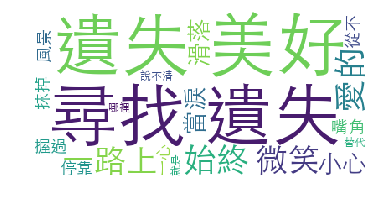

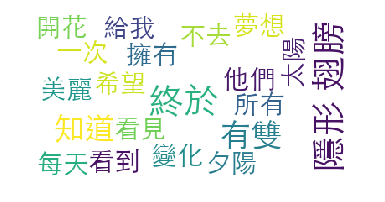

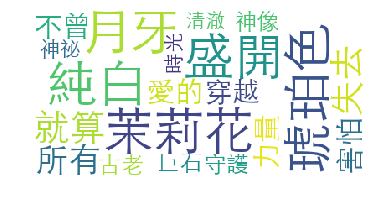

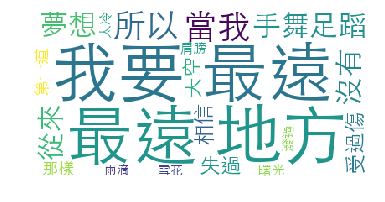

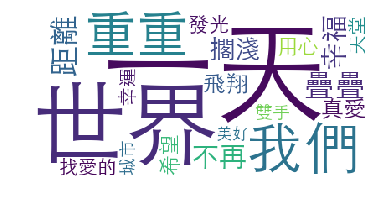

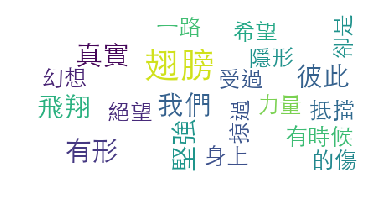

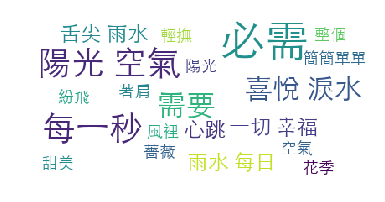

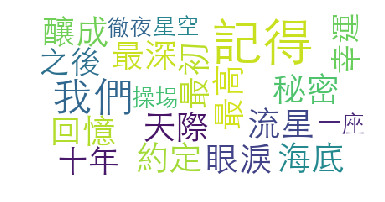

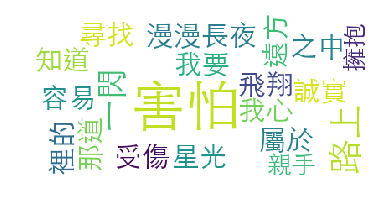

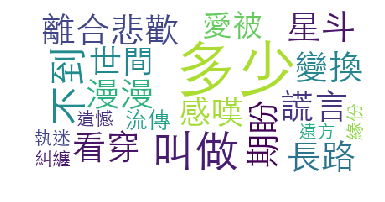

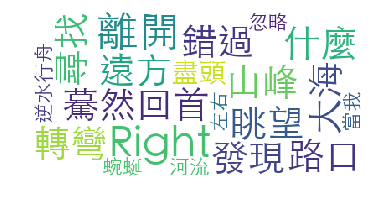

In [320]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# 讀取每首歌的前10個tags
for i in seg_list:
    text = i
    # 設定停用字(排除常用詞、無法代表特殊意義的字詞)
    stopwords = {}.fromkeys(['與非','一個','帶著','一些', '一直', '明明','唯一'])
    # 產生文字雲
    wc = WordCloud(font_path=(r"/System/Library/Fonts/STHeiti Light.ttc"), #設置字體
                   background_color="white", #背景顏色
                   max_words = 20 ,        #文字雲顯示最大詞數
                   stopwords=stopwords)      #停用字詞
    wc.generate(text)
    # 視覺化呈現
    plt.imshow(wc)
    plt.axis("off")
    plt.figure(figsize=(10,6), dpi = 10)
    plt.show()



### 文字雲可猜出：十首歌按年份排序分別為遺失的美好、隱形的翅膀、夢裡花、看得最遠的地方、城市之窗、有形的翅膀、陽光空氣、還記得嗎、不害怕、傳世之愛、沒離開過

### 新增停斷字

In [317]:
# stop words for tfidf
stop_word_list = ['與非','一個','帶著','一些', '一直', '明明','唯一']

In [321]:
### tf-idf

In [322]:
# tfidf
vectorizer = TfidfVectorizer(min_df=1, stop_words = stop_word_list)
tfidf = vectorizer.fit_transform(seg_list)


In [323]:
print('停用詞:', vectorizer.get_stop_words())
print('tfidf_shape:', tfidf.shape)

停用詞: frozenset({'一些', '一直', '明明'})
tfidf_shape: (11, 510)


### 找出10首歌的關鍵字

In [325]:
words = vectorizer.get_feature_names()
print('詞語序列:', words)


詞語序列: ['ah', 'baby', 'com', 'here', 'know', 'mojim', 'now', 'right', '一人', '一份', '一個', '一分鐘', '一切', '一刻', '一半', '一句', '一場', '一天', '一定', '一座', '一心', '一旁', '一樣', '一次', '一滴', '一生', '一瞬間', '一秒', '一起', '一路', '一路上', '一閃', '一雙眼', '一首', '一點', '不了', '不再', '不到', '不去', '不夠', '不怕', '不斷', '不是', '不曾', '不會', '不知不覺', '不管', '不肯', '不要', '不見', '不論', '世界', '世間', '串聯', '之中', '之後', '也許', '了解', '事早', '交換', '交會', '什麼', '他們', '仰起', '何必', '你給', '來得', '保護', '倔強', '值得', '停靠', '傳遞', '傷疤', '傻話', '內心', '全身', '凝望', '出發', '刻劃', '前方', '劃破', '力量', '加倍', '努力', '勇敢', '十年', '千年', '卻是', '又彈', '受傷', '受過', '受過傷', '古老', '只是', '只有', '叫做', '呼吸', '命運', '哪裡', '哪裡會', '唯一', '喜怒哀樂', '喜悅', '單純', '嘗過', '嘴角', '嘹亮', '回憶', '回答', '因為', '圍牆', '地平線', '地方', '城市', '執迷', '堅定', '堅強', '堅持', '夕陽', '多少', '多長', '多麼', '夢想', '大海', '大聲', '天亮', '天使', '天堂', '天涯海角', '天空', '天長', '天際', '太冷', '太陽', '失去', '失過', '如果', '始終', '孤單', '學著', '守護', '完全', '害怕', '容易', '寂寞', '富有', '寫滿', '寶藏', '專屬', '尋找', '小心', '就是', '就算', '就要', '屬於', '山峰', '左右', '巨石', '已經', '希望', '帶著', 

### 繪製tf-idf的陣列

In [328]:
# check the tf-idf array
tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.05076791, ..., 0.05076791, 0.        ,
        0.        ],
       [0.        , 0.06279183, 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 挑選出tf-idf>0.2的字詞

In [330]:
# check each document
for i in range(len(lyrics)):
    print('----lyric {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.2:
              print(words[j], tfidf[i,j], i ,j)

----lyric 0----
尋找 0.23255189672156557 0 149
美好 0.26022095622960123 0 378
遺失 0.3461689053134381 0 454
----lyric 1----
有雙 0.25322509547277344 1 275
終於 0.28859679070074556 1 370
翅膀 0.22681789282940926 1 380
隱形 0.28859679070074556 1 474
----lyric 2----
不曾 0.21499778054380514 2 43
唯一 0.28666370739174013 2 100
月牙 0.21499778054380514 2 270
琥珀色 0.21499778054380514 2 325
盛開 0.21499778054380514 2 338
穿越 0.21499778054380514 2 361
純白 0.21499778054380514 2 368
茉莉花 0.21499778054380514 2 394
----lyric 3----
地方 0.33813583600317987 3 112
我要 0.2548898884170162 3 219
最遠 0.339077047933566 3 267
----lyric 4----
一天 0.3913509239703483 4 17
----lyric 5----
堅強 0.20438459894866573 5 116
帶著 0.272512798598221 5 160
彼此 0.23911242836425936 5 170
有形 0.23911242836425936 5 273
真實 0.20438459894866573 5 348
翅膀 0.32126541634615957 5 380
----lyric 6----
喜悅 0.21492293840874455 6 102
必需 0.6447688152262337 6 185
每一秒 0.3223844076131169 6 288
空氣 0.37611514221530296 6 360
陽光 0.32148953120533535 6 473
需要 0.24178830570983761 6 4

### 將array形式的tf-idf以dataframe呈現

In [334]:
# Create data frame
df = pd.DataFrame(tfidf.toarray(), columns=words)

### 挑選翅膀,堅強,美好做合併來看他們在每首歌中佔的tf-idf

In [335]:
dfkey = pd.DataFrame([df['翅膀'], df['美好'], df['堅強'] ], index=["翅膀", "美好", "堅強"]).T

In [336]:
dfkey

翅膀        美好        堅強
0   0.000000  0.260221  0.000000
1   0.226818  0.000000  0.072149
2   0.000000  0.000000  0.000000
3   0.075929  0.000000  0.000000
4   0.000000  0.147093  0.000000
5   0.321265  0.000000  0.204385
6   0.000000  0.000000  0.000000
7   0.061057  0.000000  0.000000
8   0.000000  0.111718  0.000000
9   0.000000  0.000000  0.000000
10  0.000000  0.000000  0.000000

### 繪製成折線圖

In [337]:
dfkey = dfkey.rename(index={0: '2004',1:'2006',2:'2007',3:'2009',4:'2010',5:'2012',6:'2013',7:'2014',8:'2016',9:'2017',10:'2018'})

In [338]:
dfkey.index.get_values()

array(['2004', '2006', '2007', '2009', '2010', '2012', '2013', '2014',
       '2016', '2017', '2018'], dtype=object)

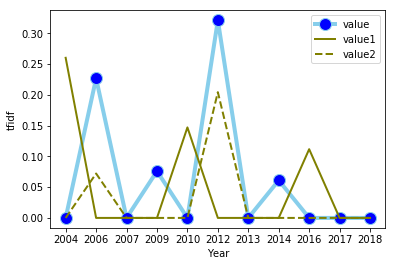

In [339]:
import matplotlib.pyplot as plt
%matplotlib inline
dff = pd.DataFrame({'value': dfkey['翅膀'],'value1':dfkey['美好'],'value2':dfkey['堅強'], 'time': dfkey.index.get_values()})
# dfff = dff.set_index('time')['value']
# multiple line plot
plt.plot( 'time', 'value', data=dff, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'time', 'value1', data=dff, marker='', color='olive', linewidth=2)
plt.plot( 'time', 'value2', data=dff, marker='', color='olive', linewidth=2, linestyle='dashed')
plt.legend()
plt.ylabel('tfidf')
plt.xlabel('Year')
plt.show()

### 可以看出value:翅膀在2012年的tf-idf值最高，value1的美好則是在2004年出現的比例最高，value2的堅強則是在2010年出現的比例最高，可回推當年那首歌所要傳達的重點